# Contestants' results 
- This notebook shows how to use this package, and more specifically part 2 (Contestant approaches for Community Detection)
- Please check other notebooks for other parts (data generation and multi-criteria approach)

## Contestants results
- Generating data (graphs) following a set of parameters
- Running contestants on those graphs and aggregating results
- Plotting results

In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import igraph
import pandas as pd
from moo.data_generation import ExpConfig, DataGenerator
from moo.contestant import get_best_community_solutions, draw_best_community_solutions
import moo.contestant as contestant
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# Define an experiment configuration instance (parameters for data generation)
# Fig. 5 (see paper)
expconfig = ExpConfig(
    L=30, U=30, NumEdges=200, ML=0.5, MU=0.5, BC=0.1, NumGraphs=30,
    shuffle=True, seed=42
)
print(expconfig) # Print parameters, or access individually, e.g., expconfig.NumEdges

# Generate data following the defined experiment confguration
expgen = DataGenerator(expconfig=expconfig) # Pass defined parameters
print(expgen)
datagen = expgen.generate_data() # datagen is an iterator

<ExpConfig: L=30, U=30, NumNodes=60, NumEdges=200, ML=0.5, MU=0.5, BC=0.1, NumGraphs=30, shuffle=True, seed=42>
<DataGenerator: ExpConfig: L=30, U=30, NumNodes=60, NumEdges=200, ML=0.5, MU=0.5, BC=0.1, NumGraphs=30, shuffle=True, seed=42>


In [14]:
# Define the contestant approaches to run on the data
# Many of those contestants are defined as subclasses of CommunityDetector class
# Please refer to contestant.py for example about how to define your own custom approach
# and use it in the following benchmarks
# In the following no parameters (default) are passed, please refer to the class init 
# for default parameter values or pass your own.

algos = [
    contestant.ComDetMultiLevel(), # Multi-Level approach
    contestant.ComDetEdgeBetweenness(), # EdgeBetweenness approach
    contestant.ComDetWalkTrap(), # WalkTrap approach
    contestant.ComDetFastGreedy(), # FastGreedy approach
]

In [15]:
# Now run each contestant algorithm on each graph in the data set
results = [] # Holds results of contestants
for g_idx, graph in enumerate(datagen):
    print(f'Processing Graph {g_idx+1}')
    for algo in algos:
        print(f'\tUsing algoithm {algo.name_}')
        result = algo.detect_communities(graph=graph).get_results()
        # Result is a list of dictionaries, each dictionary stores the metrics of one iteration (see code for details)
        for r in result: # Appending graph index to results, for debugging purposes
            r['graph_idx'] = g_idx + 1
        results.extend(result)


Processing Graph 1
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 2
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 3
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 4
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 5
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 6
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 7
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 8
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoi

In [19]:
# Optional: Convert results into a dataframe (to use pandas capabilities)
df_contestants = pd.DataFrame(results) # Column names are inferred from the dictionaries' keys
print(df_contestants.shape)
df_contestants.head()


(1440, 7)


,name,num_clusters,modularity_score,modularity_score_1,modularity_score_2,adj_rand_index,graph_idx
0,multilevel,1,0.000000,0.000000,1.110223e-16,0.000000,1
1,multilevel,2,0.394688,0.320835,2.972684e-01,1.000000,1
2,multilevel,3,0.078488,0.320835,2.972684e-01,0.744186,1
3,edgebetweenness,1,0.000000,0.000000,1.110223e-16,0.000000,1
4,edgebetweenness,2,0.394687,0.320835,2.972684e-01,1.000000,1


In [20]:
# Optional: saving results
import os
path = './_temp'
os.makedirs(path, exist_ok=True) # Create the path if it does not exist
df_contestants.to_csv(os.path.join(path, 'contestants.csv'), index=None)
# df_contestants.to_pickle('./_temp/contestants.pickle') # Binary format

In [24]:
# Extracing results for contestants
# For a given algorithm and graph pair: a hierarchy of communities is returned (different values of
# the clsuter number k). The analysis focuses on the best solution contained in the set of
# partitions (with respect to the ground truth). Therefore, the best solution for such a
# pair (a contestant run on a graph) is the maximal adjusted rand index value
# This is implemented in utils.get_best_community_solutions() that returns the best solutions
# for each (algorithm/graph) pair

best_solutions = get_best_community_solutions(df_contestants).reset_index(drop=True)
best_solutions

,name,graph_idx,adj_rand_index
0,edgebetweenness,1,1.000000
1,edgebetweenness,2,1.000000
2,edgebetweenness,3,1.000000
3,edgebetweenness,4,1.000000
4,edgebetweenness,5,1.000000
...,...,...,...
115,walktrap,26,1.000000
116,walktrap,27,0.793482
117,walktrap,28,1.000000
118,walktrap,29,1.000000


,name,count,mean,std,min,25%,50%,75%,max
0,edgebetweenness,30.0,0.983584,0.034216,0.859707,1.000000,1.000000,1.000000,1.0
1,fastgreedy,30.0,0.917904,0.084185,0.613449,0.928549,0.928549,0.982137,1.0
2,multilevel,30.0,0.944052,0.073077,0.729781,0.928549,0.964275,1.000000,1.0
3,walktrap,30.0,0.985971,0.042370,0.793482,1.000000,1.000000,1.000000,1.0


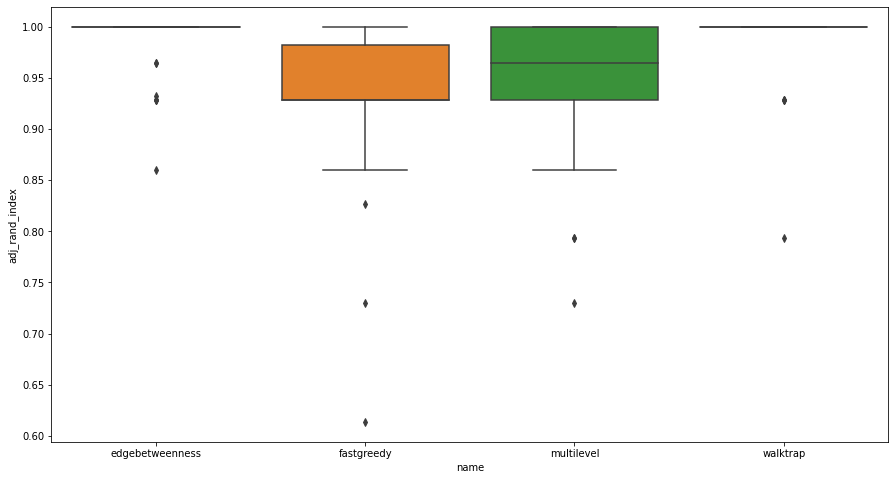

In [25]:
# Visualizing results
fig, ax = plt.subplots(figsize=(15,8))
ax, stats = draw_best_community_solutions(best_solutions,ax)
stats


## Fig. 6 results

In [30]:
# Define an experiment configuration instance (parameters for data generation)
# Fig. 6 (see paper)
expconfig = ExpConfig(
    L=30, U=30, NumEdges=100, ML=0.5, MU=0.5, BC=0.1, NumGraphs=1000,
    shuffle=True, seed=42
)
print(expconfig) # Print parameters, or access individually, e.g., expconfig.NumEdges

# Generate data following the defined experiment confguration
expgen = DataGenerator(expconfig=expconfig) # Pass defined parameters
print(expgen)
datagen = expgen.generate_data() # datagen is an iterator

<ExpConfig: L=30, U=30, NumNodes=60, NumEdges=100, ML=0.5, MU=0.5, BC=0.1, NumGraphs=1000, shuffle=True, seed=42>
<DataGenerator: ExpConfig: L=30, U=30, NumNodes=60, NumEdges=100, ML=0.5, MU=0.5, BC=0.1, NumGraphs=1000, shuffle=True, seed=42>


In [31]:
# Define the contestant approaches to run on the data
algos = [
    contestant.ComDetMultiLevel(), # Multi-Level approach
    contestant.ComDetEdgeBetweenness(), # EdgeBetweenness approach
    contestant.ComDetWalkTrap(), # WalkTrap approach
    contestant.ComDetFastGreedy(), # FastGreedy approach
]

# Now run each contestant algorithm on each graph in the data set
results = [] # Holds results of contestants
for g_idx, graph in enumerate(datagen):
    print(f'Processing Graph {g_idx+1}')
    for algo in algos:
        print(f'\tUsing algoithm {algo.name_}')
        result = algo.detect_communities(graph=graph).get_results()
        # Result is a list of dictionaries, each dictionary stores the metrics of one iteration (see code for details)
        for r in result: # Appending graph index to results, for debugging purposes
            r['graph_idx'] = g_idx + 1
        results.extend(result)

# Optional: Convert results into a dataframe (to use pandas capabilities)
df_contestants = pd.DataFrame(results) # Column names are inferred from the dictionaries' keys
print(df_contestants.shape)
df_contestants.head()

# Optional: saving results
import os
path = './_temp'
os.makedirs(path, exist_ok=True) # Create the path if it does not exist
df_contestants.to_csv(os.path.join(path, 'contestants.csv'), index=None)
# df_contestants.to_pickle('./_temp/contestants.pickle') # Binary format


Processing Graph 1
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 2
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 3
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 4
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 5
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 6
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 7
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoithm walktrap
	Using algoithm fastgreedy
Processing Graph 8
	Using algoithm multilevel
	Using algoithm edgebetweenness
	Using algoi

,name,count,mean,std,min,25%,50%,75%,max
0,edgebetweenness,1000.0,0.781232,0.175915,0.139561,0.668917,0.793482,0.927249,1.0
1,fastgreedy,1000.0,0.624054,0.209511,0.076181,0.451517,0.610592,0.789830,1.0
2,multilevel,1000.0,0.676733,0.190976,0.018125,0.547658,0.715475,0.826901,1.0
3,walktrap,1000.0,0.720729,0.186221,0.146155,0.610298,0.732973,0.857213,1.0


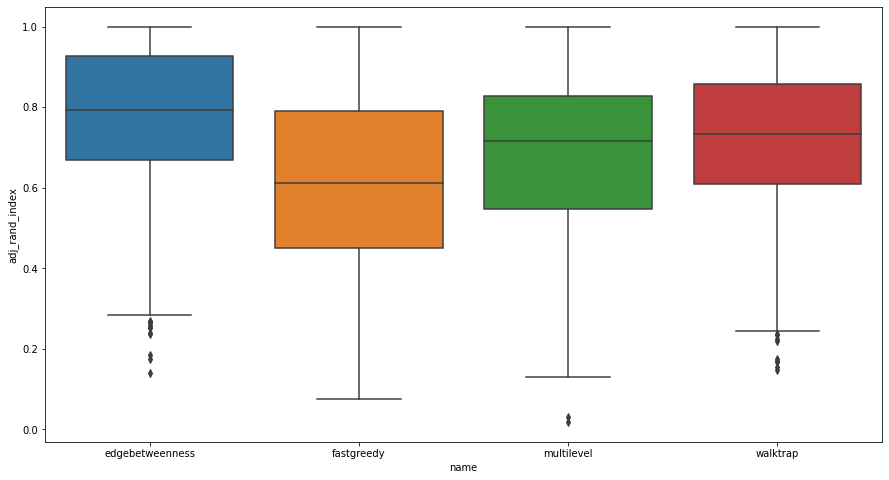

In [32]:
# Extracing results for contestants
best_solutions = get_best_community_solutions(df_contestants).reset_index(drop=True)
best_solutions

# Visualizing results
fig, ax = plt.subplots(figsize=(15,8))
ax, stats = draw_best_community_solutions(best_solutions,ax)
stats
